<a href="https://colab.research.google.com/github/eliot28/desafioLatam/blob/main/Tutori%CC%81a_5_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

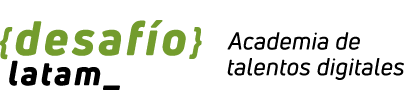

#<center><font color = 'green'>Ejercicios</font></center>

1. Tenemos dos DataFrames df1 y df2 con información de estudiantes y sus calificaciones. Combina estos DataFrames en uno solo, utilizando como clave de combinación la columna 'ID'.

In [4]:
import pandas as pd

data1 = {'ID': [1, 2, 3, 4],
         'Nombre': ['Alice', 'Bob', 'Charlie', 'David']}
data2 = {'ID': [2, 3, 4, 5],
         'Calificación': [85, 92, 78, 88]}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

#Completa aquí con tu solución
#df3 = pd.merge(df1, df2, on = 'ID', how = 'left') ## how por defecto es 'inner'
df3 = pd.merge(df1, df2, on = 'ID')

df3


,ID,Nombre,Calificación
0,2,Bob,85
1,3,Charlie,92
2,4,David,78


In [ ]:
# Combinar los DataFrames utilizando la columna 'ID' como clave
resultado = pd.merge(df1, df2, on='ID')
print(resultado)


2. Los DataFrames df3 y df4 contienen información de empleados y sus departamentos. Realiza una unión de estos DataFrames de manera que se incluyan todos los empleados, incluso aquellos que no tienen un departamento asignado.

In [5]:
import pandas as pd

data3 = {'ID': [101, 102, 103],
         'Nombre': ['Alice', 'Bob', 'Charlie']}
data4 = {'ID': [101, 103, 104],
         'Departamento': ['Ventas', 'Recursos Humanos', 'Tecnología']}

df3 = pd.DataFrame(data3)
df4 = pd.DataFrame(data4)

#Escribe aquí tu solución

df5 = pd.merge(df3, df4,
               on = 'ID', ## left_on y el right_on
               how = 'left')  ## validate
df5

,ID,Nombre,Departamento
0,101,Alice,Ventas
1,102,Bob,NaN
2,103,Charlie,Recursos Humanos


In [ ]:


# Realizar una unión de los DataFrames
resultado = pd.merge(df3, df4, on='ID', how='left')
print(resultado)


3. Los DataFrames df5 y df6 contienen información de ventas de productos en dos trimestres diferentes. Concatena estos DataFrames verticalmente para obtener un único DataFrame de ventas anuales.

In [6]:
import pandas as pd

data5 = {'Producto': ['A', 'B', 'C'],
         'Trimestre1': [100, 150, 200]}
data6 = {'Producto': ['A', 'B', 'C'],
         'Trimestre2': [120, 160, 180]}

df5 = pd.DataFrame(data5)
df6 = pd.DataFrame(data6)


#Escribe aquí tu solución


## concat

df7 = pd.concat([df5,df6],axis=0) ## cuando axis = 0 vertical y cuando axis = 1 horizontal

print(df7)

## append

df8 = df5.append(df6)

print(df8)


## cuando queremos agregar datos verticalmente usamos concat o append y cuando queremos agregar datos horizontalmente usamos merge()


  Producto  Trimestre1  Trimestre2
0        A       100.0         NaN
1        B       150.0         NaN
2        C       200.0         NaN
0        A         NaN       120.0
1        B         NaN       160.0
2        C         NaN       180.0
  Producto  Trimestre1  Trimestre2
0        A       100.0         NaN
1        B       150.0         NaN
2        C       200.0         NaN
0        A         NaN       120.0
1        B         NaN       160.0
2        C         NaN       180.0


<ipython-input-6-4dc923bca71b>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df8 = df5.append(df6)


In [8]:
df9 = pd.concat([df5,df6],axis=1)
df9

,Producto,Trimestre1,Producto,Trimestre2
0,A,100,A,120
1,B,150,B,160
2,C,200,C,180


In [7]:
# Concatenar los DataFrames verticalmente
resultado = pd.concat([df5, df6], axis=0)
print(resultado)


  Producto  Trimestre1  Trimestre2
0        A       100.0         NaN
1        B       150.0         NaN
2        C       200.0         NaN
0        A         NaN       120.0
1        B         NaN       160.0
2        C         NaN       180.0


4. El DataFrame df7 con información sobre ventas por producto y mes. Crea una tabla pivote que muestre las ventas totales por producto para cada mes.

In [10]:
import pandas as pd

data7 = {'Producto': ['A', 'B', 'A', 'B'],
         'Mes': ['Enero', 'Enero', 'Febrero', 'Febrero'],
         'Ventas': [100, 150, 120, 180]}

df7 = pd.DataFrame(data7)

#Escribe aquí tu solución

tabla_dinamica = pd.pivot_table(data = df7,
                                index = 'Producto',
                                columns = 'Mes',
                                values = 'Ventas',
                                aggfunc = 'sum')

print(type(tabla_dinamica))

tabla_dinamica

<class 'pandas.core.frame.DataFrame'>


Mes,Enero,Febrero
Producto,,
A,100,120
B,150,180


In [ ]:
# Crear una tabla pivote
tabla_pivote = df7.pivot_table(index='Producto', columns='Mes', values='Ventas', aggfunc='sum')
print(tabla_pivote)


5. El DataFrame df8 contiene información de ventas y deseas crear una nueva columna que indique si una venta es alta o baja. Considera que las ventas superiores a 150 son "altas" y las demás son "bajas".



In [14]:
import pandas as pd

data8 = {'Venta': [120, 180, 90, 200, 140]}

df8 = pd.DataFrame(data8)


#Escribe aquí tu solución


df8['tipo_venta'] = df8['Venta'].apply(lambda x:  'Alta' if x > 150  else 'Baja') ## ojo con el orden desde del lambda x:

#print(x)
df8


,Venta,tipo_venta
0,120,Baja
1,180,Alta
2,90,Baja
3,200,Alta
4,140,Baja


In [ ]:
# Crear una nueva columna utilizando una función lambda
df8['Tipo de Venta'] = df8['Venta'].apply(lambda x: 'Alta' if x > 150 else 'Baja')
print(df8)


6. El DataFrame df9 con información de empleados y sus salarios, y deseas calcular un bono del 10% sobre el salario de cada empleado utilizando una función lambda.

In [16]:
import pandas as pd

data9 = {'Nombre': ['Alice', 'Bob', 'Charlie'],
         'Salario': [50000, 60000, 75000]}

df9 = pd.DataFrame(data9)


#Escribe aquí tu solución


df9['bono'] = df9['Salario'].apply(lambda x: x*0.1) ## si quiero recorrer una o varias columnas utilizo apply

df9['bono2'] = df9['Salario']*0.1

df9

,Nombre,Salario,bono,bono2
0,Alice,50000,5000.0,5000.0
1,Bob,60000,6000.0,6000.0
2,Charlie,75000,7500.0,7500.0


In [ ]:

# Aplicar una función lambda para calcular el bono
df9['Bono'] = df9['Salario'].apply(lambda x: x * 0.10)
print(df9)


7. El DataFrame df10 contiene información de clientes, pero con entradas duplicadas. Elimina las filas duplicadas para tener un conjunto de datos único.

In [ ]:
import pandas as pd

data10 = {'Nombre': ['Alice', 'Bob', 'Alice', 'Charlie'],
          'Edad': [25, 30, 25, 35]}

df10 = pd.DataFrame(data10)

#Escribe aquí tu solución

df11 = df10.drop_duplicates()

df11


In [ ]:

# Eliminar filas duplicadas
df10 = df10.drop_duplicates()
print(df10)


8. El DataFrame df11 contiene información de ventas, pero algunos registros tienen valores faltantes (NaN). Rellena los valores faltantes en la columna 'Cantidad' con el valor promedio de esa columna.



In [17]:
import pandas as pd
import numpy as np

data11 = {'Producto': ['A', 'B', 'C', 'A', 'B'],
          'Cantidad': [10, np.nan, 15, np.nan, 20]}

df11 = pd.DataFrame(data11)
#Escribe aquí tu solución

df11['Cantidad'] = df11['Cantidad'].fillna(df11['Cantidad'].mean())

df11


,Producto,Cantidad
0,A,10.0
1,B,15.0
2,C,15.0
3,A,15.0
4,B,20.0


In [ ]:


# Rellenar valores faltantes con el promedio de la columna
promedio = df11['Cantidad'].mean()
df11['Cantidad'].fillna(promedio,
                        inplace=True)
print(df11)


9. El DataFrame df13 contiene información de productos y sus precios en diferentes monedas. Crea una nueva columna que convierta todos los precios a dólares utilizando una función personalizada.

In [46]:
import pandas as pd

data13 = {'Producto': ['A', 'B', 'C'],
          'Precio_EUR': [50, 60, 75],
          'Precio_JPY': [5500, 6600, 8250]}

df13 = pd.DataFrame(data13)

#Escribe tu solución aquí

print(df13.columns)
#def convertir(row):
#  return row['Precio_EUR']*1.08 if 'EUR' in row.column else row['Precio_JPY']*0.0067

#df13['Precio_USD'] = df13.apply(convertir,axis=1)

df13

#df14 = df13.drop(columns=['Precio_JPY'])
#df14

Index(['Producto', 'Precio_EUR', 'Precio_JPY'], dtype='object')


,Producto,Precio_EUR,Precio_JPY
0,A,50,5500
1,B,60,6600
2,C,75,8250


In [41]:

# Función para convertir monedas a dólares
def convertir_a_dolares(row):
  return row['Precio_EUR'] * 1.18 if 'EUR' in row.name else row['Precio_JPY'] * 0.0091

# Aplicar la función a cada fila
df14['Precio_USD'] = df14.apply(convertir_a_dolares, axis=1)
print(df14)


TypeError: argument of type 'int' is not iterable

10. El DataFrame df14 contiene información de productos y sus categorías. Reemplaza una categoría específica a tu elección con una nueva.

In [47]:
import pandas as pd

data14 = {'Producto': ['A', 'B', 'C', 'D'],
          'Categoría': ['Electrónica', 'Ropa', 'Electrónica', 'Juguetes']}

df14 = pd.DataFrame(data14)

#solución...




In [48]:

# Reemplazar una categoría específica
df14['Categoría'] = df14['Categoría'].replace('Ropa', 'Moda') ## le puedo dar como parametro un diccionario
print(df14)


  Producto    Categoría
0        A  Electrónica
1        B         Moda
2        C  Electrónica
3        D     Juguetes


11. El DataFrame df15 contiene información de ventas. Remplaza los valores de ventas negativas con cero.

In [49]:
import pandas as pd

data15 = {'Venta': [100, -50, 120, -30, 140]}

df15 = pd.DataFrame(data15)
#solucion

def esta_si(df):
  if df['Venta'] < 0:
    return 0
  else:
    return df['Venta']


df15['Venta2'] = df15.apply(lambda x: esta_si(x),axis=1)

df15

,Venta,Venta2
0,100,100
1,-50,0
2,120,120
3,-30,0
4,140,140


In [ ]:

# Reemplazar valores negativos con cero
df15['Venta'] = df15['Venta'].apply(lambda x: 0 if x < 0 else x)
print(df15)


In [ ]:
pd.read_pickle('incidents.pkl')



df1.merge(df2).merge(df3)


df4 = df1.merge(df2)

df5 = df4.merge(df3)


on = "case_number" ## mira aca

shape[]


diccionario = {'na': np.nan,
               ''}



{
"10000+ employees": "Mega Empresas"
,"5001 to 10000 employees": "Grandes Empresas"
,"1001 to 5000 employees": "Medianas Empresas"
,"201 to 500 employees": "Pequeñas Empresas"
,"51 to 200 employees": "Micro Empresas"
,"501 to 1000 employees": "Pequeñas Grandes Empresas"
,"Unknown": "Empresas sin Información"}



#how = 'inner' “one_to_one” or “1:1”: check if merge keys are unique in both left and right datasets.

#how = 'left' “one_to_many” or “1:m”: check if merge keys are unique in left dataset.

#how = 'right' “many_to_one” or “m:1”: check if merge keys are unique in right dataset.

#how = 'outer' “many_to_many” or “m:m”: allowed, but does not result in checks.